# The 6 Stats
---

> In a lot of these cases, the sample sizes are too small to make any assumptions. Please don't take any of this seriously ...

## When People Joined

It's actually showing when each person sent their first message. This isn't necessarily when they joined, but it's the best I can do.

In [79]:
df = pd.read_sql_query('''
    
    select
        user,
        min(date) as first
    from messages
    group by user
    order by first
    
''', disk_engine)

display(df)

,user,first
0,Christopher Daniel,2015-06-24 19:58:00-04:00
1,Ilia Choly,2015-06-24 19:58:00-04:00
2,Mike Edward,2015-06-24 19:58:00-04:00
3,Mark Meleka,2015-06-24 20:00:00-04:00
4,Kelsey Kaupp,2015-06-29 21:44:00-04:00
5,Sarah Ross,2015-06-29 21:51:00-04:00
6,Pola Kurzydlo,2015-06-29 21:54:00-04:00
7,Brandon Rosier,2015-06-29 22:13:00-04:00
8,Dylan St Onge,2015-06-30 19:21:00-04:00
9,Tom Bonomi,2015-07-01 17:51:00-04:00


## Message Per Month

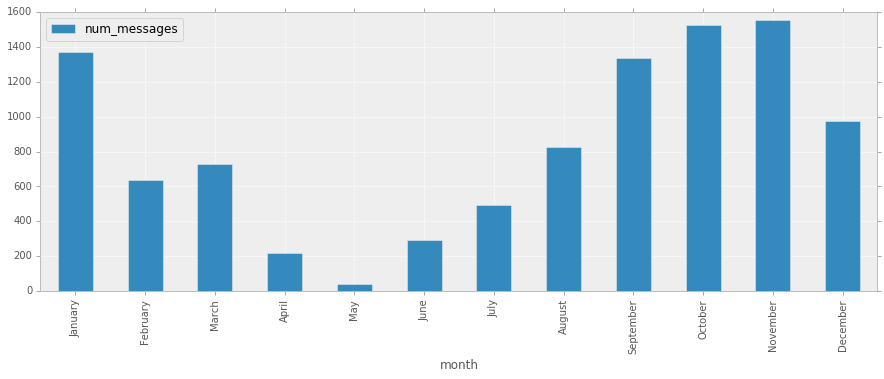

In [80]:
df = pd.read_sql_query('''
   
    select
        strftime('%m', date) as month_num,
        case cast (strftime('%m', date) as integer)
          when 1  then 'January'
          when 2  then 'February'
          when 3  then 'March'
          when 4  then 'April'
          when 5  then 'May'
          when 6  then 'June'
          when 7  then 'July'
          when 8  then 'August'
          when 9  then 'September'
          when 10 then 'October'
          when 11 then 'November'
          when 12 then 'December'
        end as month,
        count(*) as num_messages
    from messages
    group by month
    order by month_num
    
''', disk_engine)

df.plot.bar(x = 'month', y = 'num_messages')
plt.show()

# Messages Per Day Of The Week

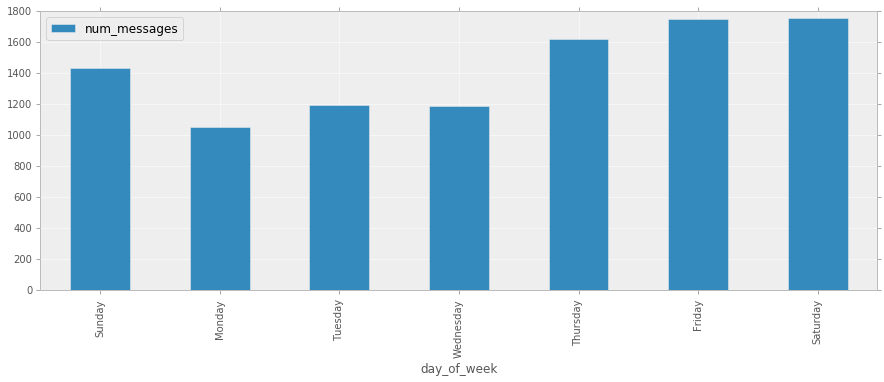

In [81]:
df = pd.read_sql_query('''
   
    select
        strftime('%w', date) as day_num,
        case cast (strftime('%w', date) as integer)
          when 0 then 'Sunday'
          when 1 then 'Monday'
          when 2 then 'Tuesday'
          when 3 then 'Wednesday'
          when 4 then 'Thursday'
          when 5 then 'Friday'
          else 'Saturday' end as day_of_week,
        count(*) as num_messages
    from messages
    group by day_of_week
    order by day_num
    
''', disk_engine)

df.plot.bar(x = 'day_of_week', y = 'num_messages')
plt.show()

## How Many Messages Does Each User Send Per Day?

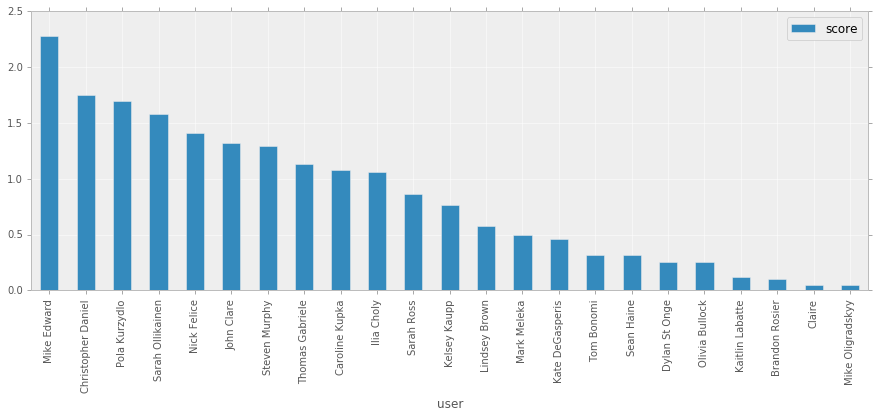

In [83]:
df = pd.read_sql_query('''
    
    select
        user,
        count(1) message_count,
        count(1) / (julianday(max(date)) - julianday(min(date))) as score
    from messages
    group by user
    having message_count > 5
    order by score desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'score')
plt.show()

## Who's Homophobic?

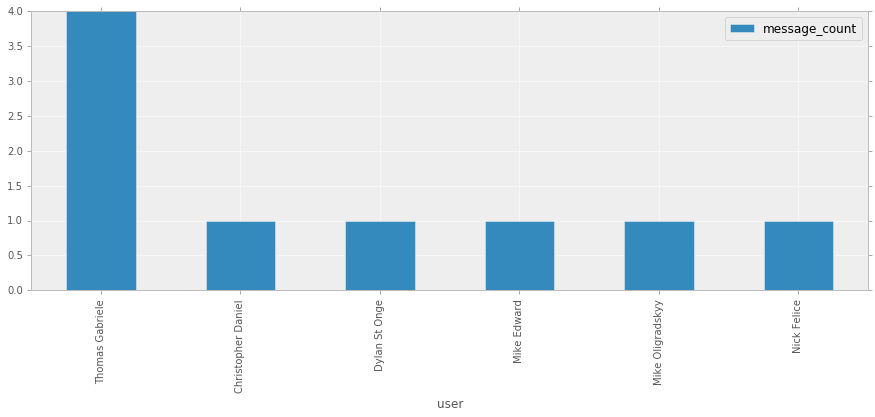

In [84]:
df = pd.read_sql_query('''
    
    select
        user,
        count(*) as message_count
    from messages
    where lower(text) like '%fag%'
       or lower(text) like '%gay%'
       or lower(text) like '%homo%'
    group by user
    order by message_count desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'message_count')
plt.show()

## Frequency Of Homophobic Messages

The total counts are not a good measure because mutliple not everyone sends the same ammount of messages. Let's use the frequency instead.

**Note:** Going forward, all plots will use the frequency instead of a count.

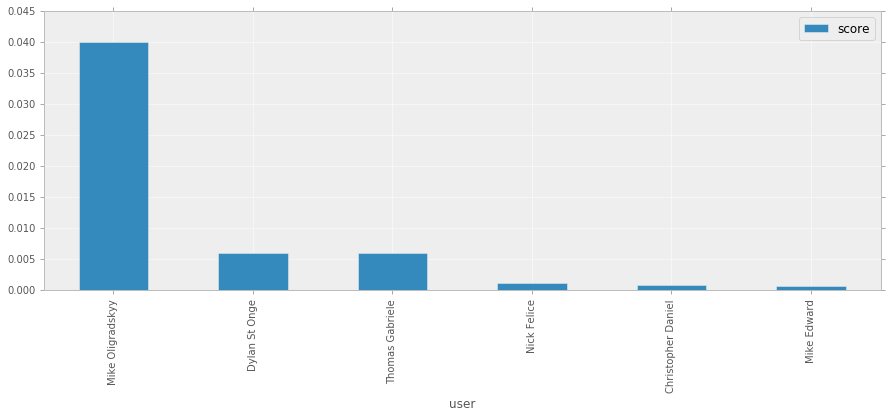

In [85]:
df = pd.read_sql_query('''

    with total_counts as (
        select
            user,
            count(*) as total_count
        from messages
        group by user
    )
    
    select
        messages.user,
        count(*)*1.0 / total_count as score
    from messages
    left join total_counts
      on messages.user = total_counts.user
    where lower(text) like '%fag%'
       or lower(text) like '%gay%'
       or lower(text) like '%homo%'
    group by messages.user
    order by score desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'score')
plt.show()

## Who's The Alchoholic?

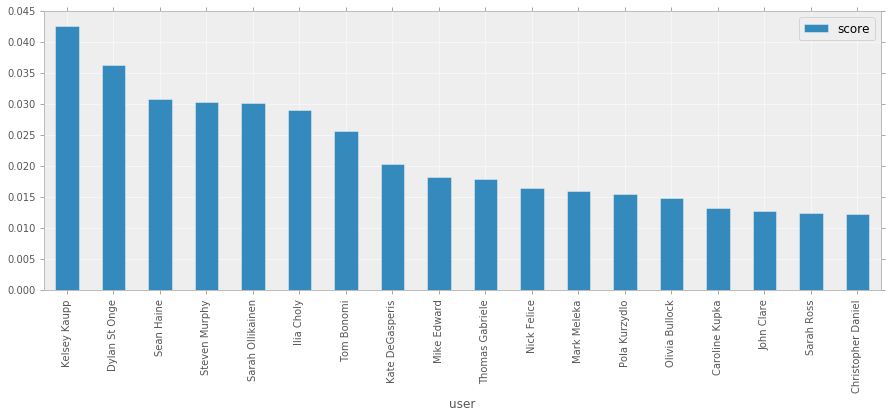

In [98]:
df = pd.read_sql_query('''

    with total_counts as (
        select
            user,
            count(*) as total_count
        from messages
        group by user
    )
    
    select
        messages.user,
        count(*)*1.0 / total_count as score
    from messages
    left join total_counts
      on messages.user = total_counts.user
    where lower(text) like '%beer%'
       or lower(text) like '%drink%'
       or lower(text) like '%drunk%'
       or lower(text) like '%alchohol%'
       or lower(text) like '%vodka%'
       or lower(text) like '%liquor%'
    group by messages.user
    order by score desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'score')
plt.show()

## Butt ...

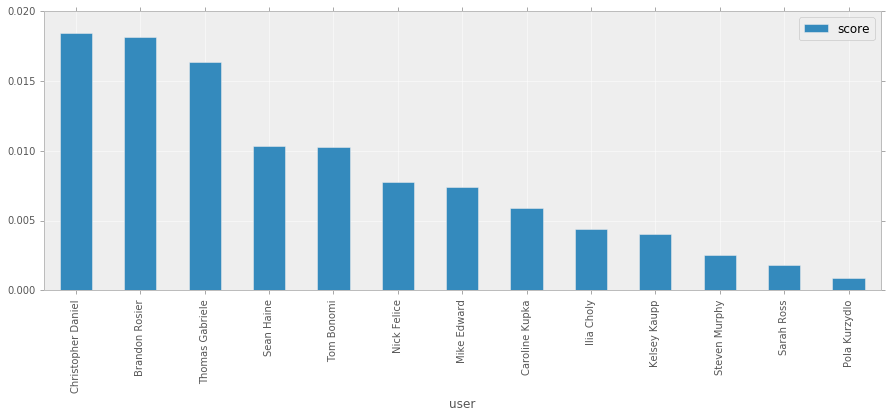

In [87]:
df = pd.read_sql_query('''

    with total_counts as (
        select
            user,
            count(*) as total_count
        from messages
        group by user
    )
    
    select
        messages.user,
        count(*)*1.0 / total_count as score
    from messages
    left join total_counts
      on messages.user = total_counts.user
    where lower(text) like '%butt%'
    group by messages.user
    order by score desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'score')
plt.show()

## Who Swears The Most?

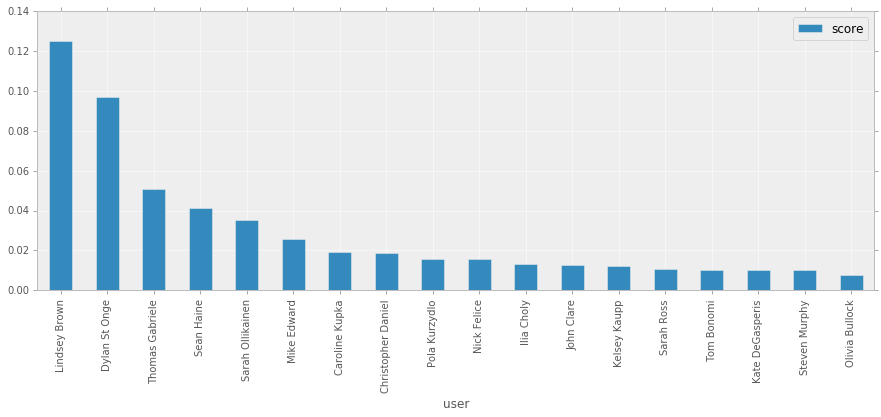

In [88]:
df = pd.read_sql_query('''

    with total_counts as (
        select
            user,
            count(*) as total_count
        from messages
        group by user
    )
    
    select
        messages.user,
        count(*)*1.0 / total_count as score
    from messages
    left join total_counts
      on messages.user = total_counts.user
    where lower(text) like '%asshole%'
       or lower(text) like '%bastard%'
       or lower(text) like '%bitch%'
       or lower(text) like '%cock%'
       or lower(text) like '%crap%'
       or lower(text) like '%damn%'
       or lower(text) like '%darn%'
       or lower(text) like '%dick%'
       or lower(text) like '%douche%'
       or lower(text) like '%fag%'
       or lower(text) like '%fuck%'
       or lower(text) like '%piss%'
       or lower(text) like '%pussy%'
       or lower(text) like '%shit%'
       or lower(text) like '%slut%'
    group by messages.user
    order by score desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'score')
plt.show()

## Who's Racist?

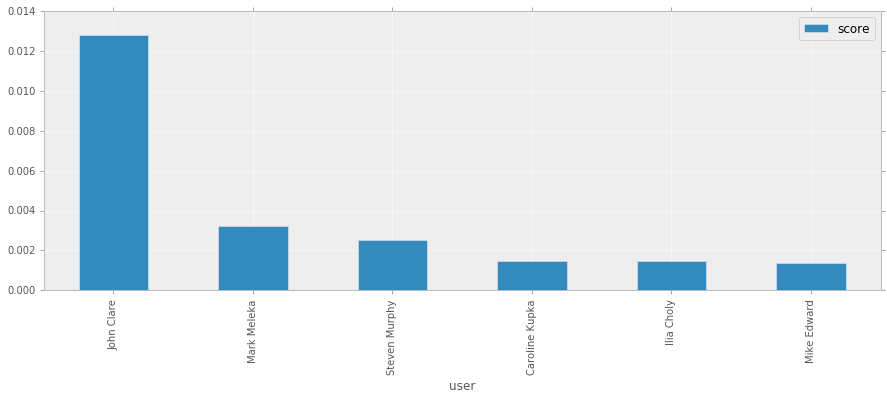

In [95]:
df = pd.read_sql_query('''

    with total_counts as (
        select
            user,
            count(*) as total_count
        from messages
        group by user
    )
    
    select
        messages.user,
        count(*)*1.0 / total_count as score
    from messages
    left join total_counts
      on messages.user = total_counts.user
    where lower(text) like '%nigger%'
       or lower(text) like '%jew%'
       or lower(text) like '%spic%'
       or lower(text) like '%wop%'
       or lower(text) like '%chink%'
       or lower(text) like '%kike%'
       or lower(text) like '%wetback%'
    group by messages.user
    order by score desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'score')
plt.show()

## Food

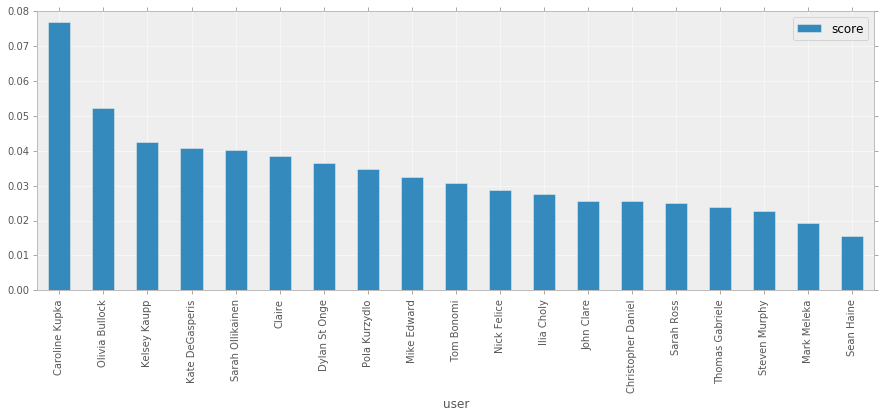

In [92]:
df = pd.read_sql_query('''

    with total_counts as (
        select
            user,
            count(*) as total_count
        from messages
        group by user
    )
    
    select
        messages.user,
        count(*)*1.0 / total_count as score
    from messages
    left join total_counts
      on messages.user = total_counts.user
    where lower(text) like '%eat%'
       or lower(text) like '%food%'
       or lower(text) like '%hungry%'
       or lower(text) like '%dinner%'
       or lower(text) like '%lunch%'
       or lower(text) like '%breakfast%'
    group by messages.user
    order by score desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'score')
plt.show()

## Average Spelling Mistakes Per Message

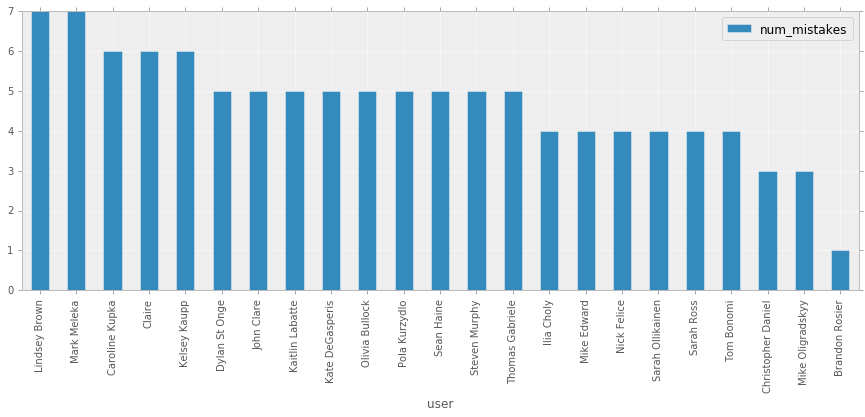

In [93]:
df = pd.read_sql_query('''

    with total_counts as (
        select
            user,
            count(*) as total_count
        from messages
        group by user
    )

    select
        messages.user,
        (sum(spelling_mistakes(text)) / total_count) as num_mistakes
    from messages
    left join total_counts
           on messages.user = total_counts.user
    where total_count > 5
    group by messages.user
    order by num_mistakes desc
    
''', disk_engine)

df.plot.bar(x = 'user', y = 'num_mistakes')
plt.show()

In [24]:
import json
import sqlite3
import dateutil.parser

def read_json(filename):
    with open(filename) as f:
        return json.load(f)

CREATE_QUERY = '''
    CREATE TABLE IF NOT EXISTS messages (
        date datetime,
        user text,
        text text
    )
'''

INSERT_QUERY = '''
    INSERT INTO messages VALUES (?, ?, ?)
'''


with sqlite3.connect("messages.db") as conn:
    cur = conn.cursor()
    cur.execute(CREATE_QUERY)
    for m in read_json("the6.json"):
        date = dateutil.parser.parse(m["date"])
        params = (date, m["user"], m["text"])
        cur.execute(INSERT_QUERY, params)
    conn.commit()

In [ ]:
import json
import ipdb
from bs4 import BeautifulSoup

def normalize_user(user, user_map = None):
    if user_map is None or user in user_map:
        return user_map[user]
    return user

def parse_users(text, user_map = None):
    users = []
    for word in text.split(" "):
        word = word.replace(",", "").strip()
        word = normalize_user(word, user_map)
        users.append(word)
    return users

def parse_threads(filename, user_map = None):
    threads = []
    with open(filename) as f:
        soup = BeautifulSoup(f)
        for thread_div in soup.find_all("div", { "class": "thread" }):
            users = parse_users(thread_div.find(text=True), user_map)
            messages = []
            for message_div in thread_div.find_all("div", { "class": "message" }):
                user = message_div.find("span", { "class": "user" }).text
                user = normalize_user(user, user_map)
                date = message_div.find("span", { "class": "meta" }).text
                text = message_div.find_next_sibling("p").text
                messages.append({ "user": user, "date": date, "text": text })
            threads.append({ "users": users, "messages": messages })
    return threads

def read_user_map(filename):
    with open(filename) as f:
        return json.load(f)


user_map = read_user_map("users.json")
threads = parse_threads("html/messages.htm", user_map)
with open("threads.json", "w") as f:
    json.dump(threads, f, indent = 2)

In [78]:
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt
import sqlite3
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
from enchant.tokenize import get_tokenizer
import enchant

matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize'] = (15, 5)

disk_engine = sqlite3.connect("messages.db")

spelling_dict = enchant.Dict("en_US")
tokenize = get_tokenizer("en_US")

def spelling_mistakes(text):
    words = tokenize(text)
    return len([w for w in words if not spelling_dict.check(w)])

disk_engine.create_function("spelling_mistakes", 1, spelling_mistakes)